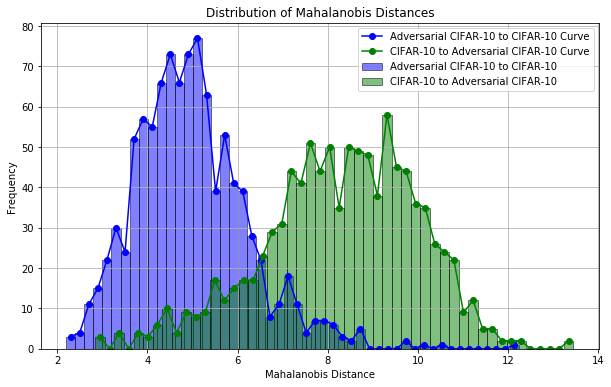

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
from scipy.linalg import inv

# Load the numpy files
adversarial_data = np.load('adversarial_cifar10.npy')
cifar_data = np.load('cifar10.npy')

# Function to calculate Mahalanobis distances
def calculate_mahalanobis_distances(data, mean, inv_cov):
    return [mahalanobis(x, mean, inv_cov) for x in data]

# Compute the mean and covariance matrix of the CIFAR-10 data
mean_cifar = np.mean(cifar_data, axis=0)
cov_cifar = np.cov(cifar_data, rowvar=False)
inv_cov_cifar = inv(cov_cifar)

# Compute the mean and covariance matrix of the adversarial CIFAR-10 data
mean_adversarial = np.mean(adversarial_data, axis=0)
cov_adversarial = np.cov(adversarial_data, rowvar=False)
inv_cov_adversarial = inv(cov_adversarial)

# Calculate Mahalanobis distances
mahalanobis_distances_adversarial_to_cifar = calculate_mahalanobis_distances(adversarial_data, mean_cifar, inv_cov_cifar)
mahalanobis_distances_cifar_to_adversarial = calculate_mahalanobis_distances(cifar_data, mean_adversarial, inv_cov_adversarial)

# Summarize the Mahalanobis distances
average_mahalanobis_distance_adversarial_to_cifar = np.mean(mahalanobis_distances_adversarial_to_cifar)
average_mahalanobis_distance_cifar_to_adversarial = np.mean(mahalanobis_distances_cifar_to_adversarial)

# print(f"Average Mahalanobis Distance (Adversarial CIFAR-10 to CIFAR-10): {average_mahalanobis_distance_adversarial_to_cifar}")
# print(f"Average Mahalanobis Distance (CIFAR-10 to Adversarial CIFAR-10): {average_mahalanobis_distance_cifar_to_adversarial}")

# Function to plot the frequency curve
def plot_frequency_curve(distances, bins, color, label):
    hist, bin_edges = np.histogram(distances, bins=bins)
    bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_mids, hist, marker='o', linestyle='-', color=color, label=label)

# Plot the histograms and frequency curves
plt.figure(figsize=(10, 6))

# Histogram for Adversarial CIFAR-10 to CIFAR-10
hist_adversarial, bins_adversarial, _ = plt.hist(mahalanobis_distances_adversarial_to_cifar, bins=50, alpha=0.5, color='blue', edgecolor='black', label='Adversarial CIFAR-10 to CIFAR-10')

# Frequency curve for Adversarial CIFAR-10 to CIFAR-10
plot_frequency_curve(mahalanobis_distances_adversarial_to_cifar, bins=50, color='blue', label='Adversarial CIFAR-10 to CIFAR-10 Curve')

# Histogram for CIFAR-10 to Adversarial CIFAR-10
hist_cifar, bins_cifar, _ = plt.hist(mahalanobis_distances_cifar_to_adversarial, bins=50, alpha=0.5, color='green', edgecolor='black', label='CIFAR-10 to Adversarial CIFAR-10')

# Frequency curve for CIFAR-10 to Adversarial CIFAR-10
plot_frequency_curve(mahalanobis_distances_cifar_to_adversarial, bins=50, color='green', label='CIFAR-10 to Adversarial CIFAR-10 Curve')

plt.xlabel('Mahalanobis Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Mahalanobis Distances')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()


In [6]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import mahalanobis
from scipy.linalg import inv

# Load the numpy files
adversarial_data = np.load('adversarial_cifar10.npy')
cifar_data = np.load('cifar10.npy')

# Function to calculate Mahalanobis distances
def calculate_mahalanobis_distances(data, mean, inv_cov):
    return [mahalanobis(x, mean, inv_cov) for x in data]

# Compute the mean and covariance matrix of the CIFAR-10 data
mean_cifar = np.mean(cifar_data, axis=0)
cov_cifar = np.cov(cifar_data, rowvar=False)
inv_cov_cifar = inv(cov_cifar)

# Compute the mean and covariance matrix of the adversarial CIFAR-10 data
mean_adversarial = np.mean(adversarial_data, axis=0)
cov_adversarial = np.cov(adversarial_data, rowvar=False)
inv_cov_adversarial = inv(cov_adversarial)

# Calculate Mahalanobis distances
mahalanobis_distances_adversarial_to_cifar = calculate_mahalanobis_distances(adversarial_data, mean_cifar, inv_cov_cifar)
mahalanobis_distances_cifar_to_adversarial = calculate_mahalanobis_distances(cifar_data, mean_adversarial, inv_cov_adversarial)

# Combine distances into a single list
combined_distances = mahalanobis_distances_adversarial_to_cifar + mahalanobis_distances_cifar_to_adversarial

# Normalize distances to range 0-200
min_distance = np.min(combined_distances)
max_distance = np.max(combined_distances)
normalized_distances = [(x - min_distance) / (max_distance - min_distance) * 200 for x in combined_distances]

# Create a DataFrame with both original and normalized distances
df = pd.DataFrame({
    'original_distance': combined_distances,
    'normalized_distance': normalized_distances
})

# Add the 'actual_class' column
df['actual_class'] = ['Unsafe Query'] * 1000 + ['Safe Query'] * 1000

# Save the DataFrame to a CSV file
df.to_csv('new_mahalanobis_distances.csv', index=False)

print("CSV file 'new_mahalanobis_distances.csv' created successfully.")

CSV file 'new_mahalanobis_distances.csv' created successfully.
